In [39]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

In [40]:
print(tf.__version__)
batch_size = 128
nb_classes = 10
nb_epoch = 12

1.13.1


In [41]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [42]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [43]:
train_images.shape

(60000, 28, 28)

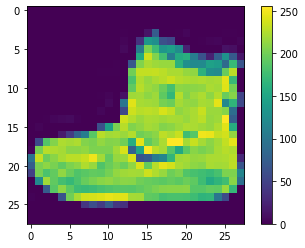

In [44]:
plt.show()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [45]:
print(train_lebels)

[9 0 0 ... 3 0 5]


In [46]:
# Normalizing the data
train_images = train_images/255.0
train_images = train_images/255.0

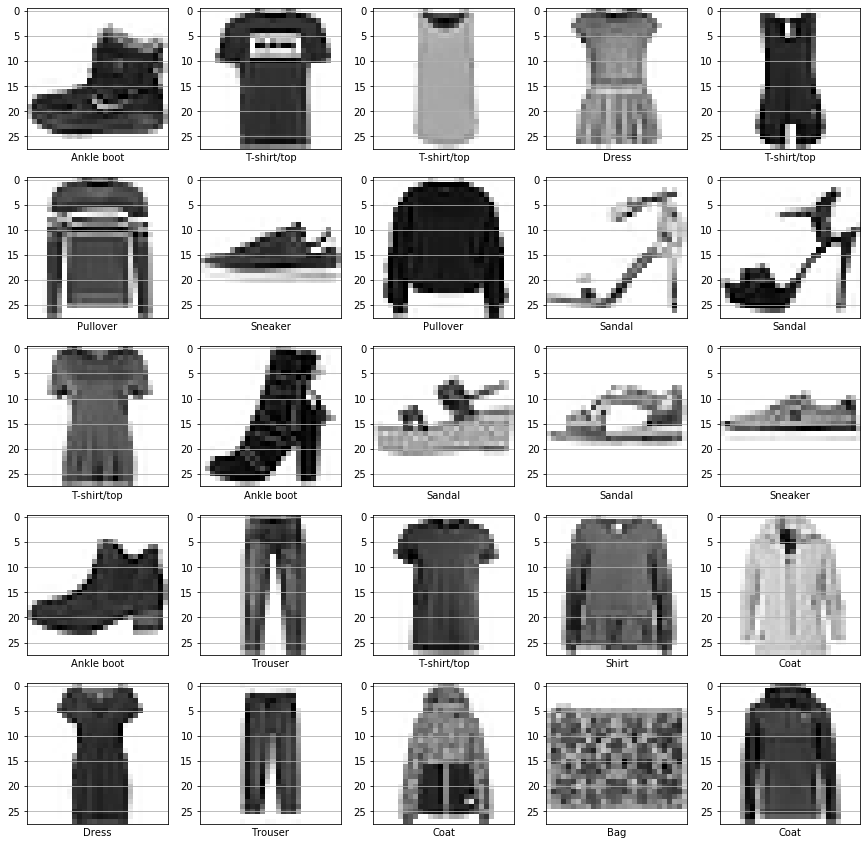

In [47]:
%matplotlib inline

# showing images
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.xticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lebels[i]])
    

In [48]:
# Now I will use the deep neural network for classifing the models

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [52]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy')

In [53]:
# Now I will train a model
model.fit(train_images, train_labels, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 2s 28us/sample - loss: 1.1648 - val_loss: 6.3270
Epoch 2/12
60000/60000 [==============================] - 1s 20us/sample - loss: 0.6544 - val_loss: 6.0992
Epoch 3/12
60000/60000 [==============================] - 1s 19us/sample - loss: 0.5791 - val_loss: 5.9540
Epoch 4/12
60000/60000 [==============================] - 1s 20us/sample - loss: 0.5375 - val_loss: 5.6816
Epoch 5/12
60000/60000 [==============================] - 1s 20us/sample - loss: 0.5083 - val_loss: 5.7735
Epoch 6/12
60000/60000 [==============================] - 1s 20us/sample - loss: 0.4836 - val_loss: 5.7957
Epoch 7/12
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4645 - val_loss: 5.5066
Epoch 8/12
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4475 - val_loss: 5.4963
Epoch 9/12
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4340 - val_

In [57]:
test_loss = model.evaluate(test_images,test_labels)
test_loss

10000/10000 [==============================] - 0s 25us/sample - loss: 4.8725


4.872522142791748

In [58]:
predictions = model.predict(test_images)

In [59]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [60]:
np.argmax(predictions[0])

9

Actual class: Ankle boot
Predicted class: Ankle boot


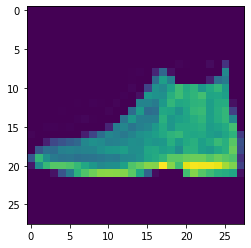

In [63]:
plt.imshow(test_images[0])
print('Actual class:', class_names[test_labels[0]])
print('Predicted class:', class_names[np.argmax(predictions[0])])